In [5]:
import pandas as pd

df = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [8]:
df.lpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
df.lpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda x: x.total_seconds() / 60)

In [9]:
df.duration.std()

42.59435124195458

In [10]:
new_df = df[(df.duration >= 1) & (df.duration <= 60)]
len(new_df)/len(df)

0.9812202822125979

In [11]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [12]:
new_df[categorical] = new_df[categorical].astype(str)

C:\Users\MiGi\AppData\Local\Temp\ipykernel_23388\4095662405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[categorical] = new_df[categorical].astype(str)


In [15]:
new_df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

### Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

- Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)

- Fit a dictionary vectorizer

- Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [35]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import seaborn as sns

In [19]:
train_dicts = new_df[categorical].to_dict(orient='records')

In [20]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [21]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6018346 stored elements and shape (3009173, 515)>

In [27]:
target = 'duration'
y_train = new_df[target].values

### Q5 Training a model

Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable

Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_train)

In [37]:
rmse = root_mean_squared_error(y_train, y_pred)
rmse

7.649261937621321

C:\Users\MiGi\AppData\Local\Temp\ipykernel_23388\1351390157.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\MiGi\AppData\Local\Temp\ipykernel_23388\1351390157.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


<Axes: ylabel='Density'>

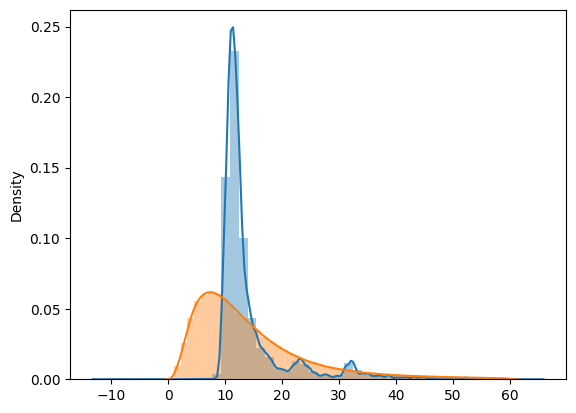

In [33]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

### Q6 Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [ ]:
val_df = pd.read_parquet('yellow_tripdata_2023-02.parquet')
val_df.lpep_dropoff_datetime = pd.to_datetime(val_df.tpep_dropoff_datetime)
val_df.lpep_pickup_datetime = pd.to_datetime(val_df.tpep_pickup_datetime)
val_df['duration'] = val_df.lpep_dropoff_datetime - val_df.lpep_pickup_datetime
val_df.duration = val_df.duration.apply(lambda x : x.total_seconds() / 60)


C:\Users\MiGi\AppData\Local\Temp\ipykernel_23388\793668715.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  val_df.lpep_dropoff_datetime = pd.to_datetime(val_df.tpep_dropoff_datetime)
C:\Users\MiGi\AppData\Local\Temp\ipykernel_23388\793668715.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  val_df.lpep_pickup_datetime = pd.to_datetime(val_df.tpep_pickup_datetime)


In [42]:
val_df = val_df[(val_df.duration >= 1) & (val_df.duration <= 60)]

In [43]:
val_df[categorical] = val_df[categorical].astype(str)
val_dicts = val_df[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [44]:

y_val = val_df[target].values

In [45]:
y_pred = lr.predict(X_val)

In [47]:
val_rmse = root_mean_squared_error(y_val, y_pred)
val_rmse

7.811817646307258